## Dataset and Dataloader

In [1]:
import torch
import matplotlib.pyplot as plt

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# import Train Data from FashionMNIST
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

# import Test Data from FashionMNIST
test_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

In [3]:
# Classes in FashionMNIST Dataset
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

##### You can access Dataset like Python list index.

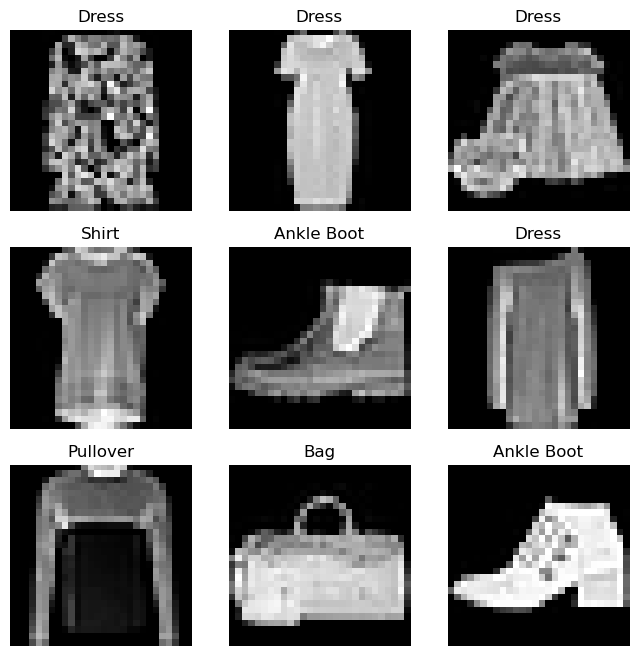

In [4]:
# Visulalization of data in FashionMNIST Dataset
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()

    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)

    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    
plt.show()

### Create Custom Dataset

- Custom Dataset classes must implement 3 functions: 
> `__init__`, `__len__` and `__getitem__`


In [5]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataet(Dataset):
    # Will be executed when class object is created
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transofrm = target_transform

    # Return the number of samples in dataset
    def __len__(self):
        return len(self.img_labels)
    
    # Gets and returns samples corresponding to a given index(idx) from the dataset
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)

        if self.target_transofrm:
            label = self.target_transofrm(label)
        
        sample = {"image": image, "label": label}

        return sample

### Prepare Data for Training with Dataloader

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate Dataset with Dataloader

Feature Batch Shape: torch.Size([64, 1, 28, 28])
Labels Batch Shape: torch.Size([64])


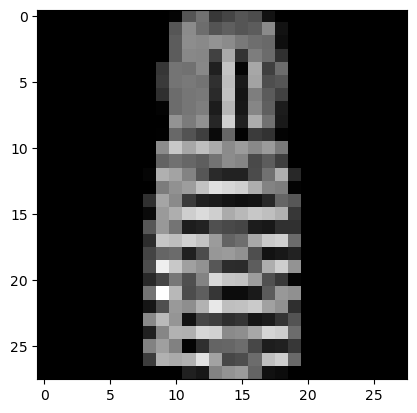

Label: 3


In [7]:
# Visuailze the image and label
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature Batch Shape: {train_features.size()}")
print(f"Labels Batch Shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()

print(f"Label: {label}")